# DESCRIPTION de kmean :
L'algorithme K-means est un algorithme d'apprentissage non supervisé utilisé pour résoudre des problèmes de clustering. Il suit une procédure itérative pour classer un ensemble de données dans un nombre fixé à l'avance de clusters, noté "k".
Au départ, k centres de cluster sont sélectionnés aléatoirement dans l'espace des caractéristiques pour représenter les positions des clusters. Ensuite, la distance entre chaque point de données et les centres de cluster est calculée, généralement en utilisant la distance euclidienne. Chaque point de données est attribué au centre de cluster le plus proche en termes de distance.
Après cette étape d'attribution, les centres de cluster sont mis à jour. Cela implique de recalculer les nouvelles positions des centres de cluster en utilisant les points de données attribués à chaque cluster. Les nouvelles positions sont généralement déterminées en calculant la moyenne des caractéristiques de tous les points de données du cluster.
Ce processus d'attribution et de mise à jour est répété de manière itérative jusqu'à ce qu'une convergence soit atteinte, c'est-à-dire que les centres de cluster ne se déplacent que très peu entre les itérations successives ou que certains critères d'arrêt prédéfinis soient satisfaits.
Ainsi, l'algorithme K-means vise à minimiser l'inertie intra-cluster, qui mesure la dispersion des points de données à l'intérieur de chaque cluster, en regroupant les points de données similaires ensemble.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremyfouquet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeremyfouquet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train = pd.read_csv("train.csv", sep=",")
train

,metier,competences
0,Scrum master,Analyser les besoins du client. Analyser les b...
1,Scrum master,Analyser les besoins du client. Concevoir et d...
2,Scrum master,Analyser les besoins du client. Concevoir et d...
3,Scrum master,Analyser les besoins du client. Concevoir et d...
4,Scrum master,Analyser les besoins du client. Concevoir et d...
...,...,...
3199,Développeur informatique,Analyser les besoins du client. Concevoir et d...
3200,Développeur informatique,Langage informatique Java. Langage informatiqu...
3201,Développeur informatique,Analyser les besoins du client. Concevoir et d...
3202,Développeur informatique,Analyser les besoins du client. Concevoir et d...


In [3]:
# Prétraitement du texte
stop_words = set(stopwords.words('french'))  # Mots vides en français
train['competences'] = train['competences'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words]))

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['competences'])

In [5]:
k = 30  # Nombre de clusters (métiers)
n_init = 10  # Nombre d'initialisations pour l'algorithme K-means

kmeans = KMeans(n_clusters=k, n_init=n_init)
kmeans.fit(X)

KMeans(n_clusters=30, n_init=10)

In [6]:
train['cluster'] = kmeans.labels_

In [7]:
# Calcul de l'inertie (somme des carrés des distances des échantillons à leur centre de cluster le plus proche)
inertia = kmeans.inertia_

# Calcul de l'indice de silhouette
silhouette_score = metrics.silhouette_score(X, kmeans.labels_)

print("Inertie : ", inertia)
print("Indice de silhouette : ", silhouette_score)

Inertie :  641.6154824258028
Indice de silhouette :  0.6144319682251723


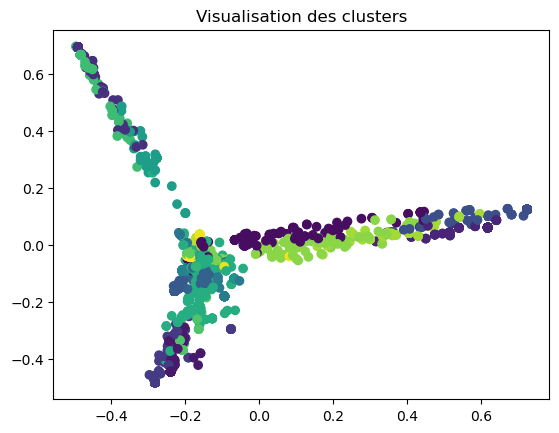

In [8]:
# Réduction de dimension pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Visualisation des clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Visualisation des clusters")
plt.show()

In [ ]:
def predire_metier(nouvelle_description):
    # Prétraitement de la nouvelle liste de competences
    nouvelle_competences_preprocessed = ' '.join([word for word in word_tokenize(nouvelles_competences.lower()) if word.isalpha() and word not in stop_words])
    # Vectorisation de la nouvelle iste de competences
    nouvelle_competences_vectorized = vectorizer.transform([nouvelle_competences_preprocessed])
    # Prédiction du cluster pour la nouvelle iste de competences
    nouveau_cluster = kmeans.predict(nouvelle_competences_vectorized)[0]
    # Récupération du nom du métier correspondant au cluster prédit
    nom_metier_predit = train[train['cluster'] == nouveau_cluster]['metier'].values[0]    
    return nom_metier_predit

# Utilisation de la fonction de prédiction
# ex = 'Application web. Concevoir une application web. Déterminer des mesures correctives. Réaliser un diagnostic technique. Rédiger un cahier des charges, des spécifications techniques. Faire preuve de réactivité. Respecter ses engagements, assumer ses responsabilités. Faire preuve de rigueur et de précision'
nom_metier_predit = input("Veuillez saisir une description de compétences : ")
print("Métier prédit :", nom_metier_predit)

In [ ]:
del train, stop_words, vectorizer, X, k, n_init, kmeans, nom_metier_predit, inertia, silhouette_score, pca, X_pca